<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Classification

## Part 2: Model Building

### Contents:
- [Import data](#Import-data)
- [Baseline model](#Baseline-model)
- [Baseline model with SMOTE](#Baseline-model-with-SMOTE)
- [Models Fitting and Evaluation](#Models-Fitting-and-Evaluation)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)

In [334]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas settings
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None  # default='warn'

# Import metrics.
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.inspection import permutation_importance

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.utils import shuffle
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

## Import data

In [335]:
# Import Data
train = pd.read_csv('../data/train_final.csv')
test = pd.read_csv('../data/test_final.csv')
submission = pd.read_csv('../data/sampleSubmission.csv')

In [336]:
print('Train: ', train.shape)
print('Test: ', test.shape)

Train:  (8610, 161)
Test:  (116293, 160)


In [337]:
train.head()

,date,species,latitude,longitude,wnvpresent,nummosquitos,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,wetdry,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,trap_T001,trap_T002,trap_T003,trap_T004,trap_T005,trap_T006,trap_T007,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T017,trap_T018,trap_T019,trap_T025,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T034,trap_T035,trap_T036,trap_T037,trap_T039,trap_T040,trap_T043,trap_T044,trap_T045,trap_T046,trap_T047,trap_T048,trap_T049,trap_T050,trap_T051,trap_T054,trap_T060,trap_T061,trap_T062,trap_T063,trap_T065,trap_T066,trap_T067,trap_T069,trap_T070,trap_T071,trap_T072,trap_T073,trap_T074,trap_T075,trap_T076,trap_T077,trap_T078,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T088,trap_T089,trap_T090,trap_T091,trap_T092,trap_T094,trap_T095,trap_T096,trap_T097,trap_T099,trap_T100,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T129,trap_T135,trap_T138,trap_T141,trap_T142,trap_T143,trap_T144,trap_T145,trap_T146,trap_T147,trap_T148,trap_T149,trap_T150,trap_T151,trap_T152,trap_T153,trap_T154,trap_T155,trap_T156,trap_T157,trap_T158,trap_T159,trap_T160,trap_T161,trap_T162,trap_T200,trap_T206,trap_T209,trap_T212,trap_T215,trap_T218,trap_T219,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T229,trap_T230,trap_T231,trap_T232,trap_T233,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903,trap_T234
0,2007-05-29,2.0,41.867108,-87.654224,0,1,2.0,88,65,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,1.0,41.867108,-87.654224,0,2,2.0,88,65,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,1.0,41.862292,-87.648860,0,1,2.0,88,65,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,1.0,41.896282,-87.655232,0,1,2.0,88,65,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,1.0,41.907645,-87.760886,0,1,2.0,88,65,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [338]:
test.head()

,id,date,species,latitude,longitude,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,wetdry,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,trap_T001,trap_T002,trap_T003,trap_T004,trap_T005,trap_T006,trap_T007,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T017,trap_T018,trap_T019,trap_T025,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T034,trap_T035,trap_T036,trap_T037,trap_T039,trap_T040,trap_T043,trap_T044,trap_T045,trap_T046,trap_T047,trap_T048,trap_T049,trap_T050,trap_T051,trap_T054,trap_T060,trap_T061,trap_T062,trap_T063,trap_T065,trap_T066,trap_T067,trap_T069,trap_T070,trap_T071,trap_T072,trap_T073,trap_T074,trap_T075,trap_T076,trap_T077,trap_T078,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T088,trap_T089,trap_T090,trap_T091,trap_T092,trap_T094,trap_T095,trap_T096,trap_T097,trap_T099,trap_T100,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T129,trap_T135,trap_T138,trap_T141,trap_T142,trap_T143,trap_T144,trap_T145,trap_T146,trap_T147,trap_T148,trap_T149,trap_T150,trap_T151,trap_T152,trap_T153,trap_T154,trap_T155,trap_T156,trap_T157,trap_T158,trap_T159,trap_T160,trap_T161,trap_T162,trap_T200,trap_T206,trap_T209,trap_T212,trap_T215,trap_T218,trap_T219,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T229,trap_T230,trap_T231,trap_T232,trap_T233,trap_T234,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
0,1,2008-06-11,2.0,41.95469,-87.800991,1.0,86,61,73.5,56,64.0,0.0,9.0,416,1926,0,0.0,29.28,29.99,8.9,18,10.0,2008,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2008-06-11,1.0,41.95469,-87.800991,1.0,86,61,73.5,56,64.0,0.0,9.0,416,1926,0,0.0,29.28,29.99,8.9,18,10.0,2008,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2008-06-11,3.0,41.95469,-87.800991,1.0,86,61,73.5,56,64.0,0.0,9.0,416,1926,0,0.0,29.28,29.99,8.9,18,10.0,2008,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2008-06-11,0.0,41.95469,-87.800991,1.0,86,61,73.5,56,64.0,0.0,9.0,416,1926,0,0.0,29.28,29.99,8.9,18,10.0,2008,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2008-06-11,0.0,41.95469,-87.800991,1.0,86,61,73.5,56,64.0,0.0,9.0,416,1926,0,0.0,29.28,29.99,8.9,18,10.0,2008,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [339]:
# Prepare datasets for modelling
train_col_drop = ['date', 'nummosquitos', 'wnvpresent', 'tmax', 'tmin']
test_col_drop = ['id', 'date', 'tmax', 'tmin']
X = train.drop(columns = train_col_drop)
y = train['wnvpresent']
X_kaggle = test.drop(columns = test_col_drop)

In [340]:
X.head(2)

,species,latitude,longitude,station,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,wetdry,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,trap_T001,trap_T002,trap_T003,trap_T004,trap_T005,trap_T006,trap_T007,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T017,trap_T018,trap_T019,trap_T025,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T034,trap_T035,trap_T036,trap_T037,trap_T039,trap_T040,trap_T043,trap_T044,trap_T045,trap_T046,trap_T047,trap_T048,trap_T049,trap_T050,trap_T051,trap_T054,trap_T060,trap_T061,trap_T062,trap_T063,trap_T065,trap_T066,trap_T067,trap_T069,trap_T070,trap_T071,trap_T072,trap_T073,trap_T074,trap_T075,trap_T076,trap_T077,trap_T078,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T088,trap_T089,trap_T090,trap_T091,trap_T092,trap_T094,trap_T095,trap_T096,trap_T097,trap_T099,trap_T100,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T129,trap_T135,trap_T138,trap_T141,trap_T142,trap_T143,trap_T144,trap_T145,trap_T146,trap_T147,trap_T148,trap_T149,trap_T150,trap_T151,trap_T152,trap_T153,trap_T154,trap_T155,trap_T156,trap_T157,trap_T158,trap_T159,trap_T160,trap_T161,trap_T162,trap_T200,trap_T206,trap_T209,trap_T212,trap_T215,trap_T218,trap_T219,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T229,trap_T230,trap_T231,trap_T232,trap_T233,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903,trap_T234
0,2.0,41.867108,-87.654224,2.0,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,41.867108,-87.654224,2.0,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [341]:
X_kaggle.head(2)

,species,latitude,longitude,station,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,wetdry,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,trap_T001,trap_T002,trap_T003,trap_T004,trap_T005,trap_T006,trap_T007,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T017,trap_T018,trap_T019,trap_T025,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T034,trap_T035,trap_T036,trap_T037,trap_T039,trap_T040,trap_T043,trap_T044,trap_T045,trap_T046,trap_T047,trap_T048,trap_T049,trap_T050,trap_T051,trap_T054,trap_T060,trap_T061,trap_T062,trap_T063,trap_T065,trap_T066,trap_T067,trap_T069,trap_T070,trap_T071,trap_T072,trap_T073,trap_T074,trap_T075,trap_T076,trap_T077,trap_T078,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T088,trap_T089,trap_T090,trap_T091,trap_T092,trap_T094,trap_T095,trap_T096,trap_T097,trap_T099,trap_T100,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T129,trap_T135,trap_T138,trap_T141,trap_T142,trap_T143,trap_T144,trap_T145,trap_T146,trap_T147,trap_T148,trap_T149,trap_T150,trap_T151,trap_T152,trap_T153,trap_T154,trap_T155,trap_T156,trap_T157,trap_T158,trap_T159,trap_T160,trap_T161,trap_T162,trap_T200,trap_T206,trap_T209,trap_T212,trap_T215,trap_T218,trap_T219,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T229,trap_T230,trap_T231,trap_T232,trap_T233,trap_T234,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
0,2.0,41.95469,-87.800991,1.0,73.5,56,64.0,0.0,9.0,416,1926,0,0.0,29.28,29.99,8.9,18,10.0,2008,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,41.95469,-87.800991,1.0,73.5,56,64.0,0.0,9.0,416,1926,0,0.0,29.28,29.99,8.9,18,10.0,2008,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


It seems that the columns ordering for X is not as X_kaggle. We will re-order the columns for X.

In [342]:
# Re-arrange columns for X
X = X[X_kaggle.columns]
X.head()

,species,latitude,longitude,station,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,wetdry,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,trap_T001,trap_T002,trap_T003,trap_T004,trap_T005,trap_T006,trap_T007,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T017,trap_T018,trap_T019,trap_T025,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T034,trap_T035,trap_T036,trap_T037,trap_T039,trap_T040,trap_T043,trap_T044,trap_T045,trap_T046,trap_T047,trap_T048,trap_T049,trap_T050,trap_T051,trap_T054,trap_T060,trap_T061,trap_T062,trap_T063,trap_T065,trap_T066,trap_T067,trap_T069,trap_T070,trap_T071,trap_T072,trap_T073,trap_T074,trap_T075,trap_T076,trap_T077,trap_T078,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T088,trap_T089,trap_T090,trap_T091,trap_T092,trap_T094,trap_T095,trap_T096,trap_T097,trap_T099,trap_T100,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T129,trap_T135,trap_T138,trap_T141,trap_T142,trap_T143,trap_T144,trap_T145,trap_T146,trap_T147,trap_T148,trap_T149,trap_T150,trap_T151,trap_T152,trap_T153,trap_T154,trap_T155,trap_T156,trap_T157,trap_T158,trap_T159,trap_T160,trap_T161,trap_T162,trap_T200,trap_T206,trap_T209,trap_T212,trap_T215,trap_T218,trap_T219,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T229,trap_T230,trap_T231,trap_T232,trap_T233,trap_T234,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
0,2.0,41.867108,-87.654224,2.0,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,41.867108,-87.654224,2.0,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,41.862292,-87.648860,2.0,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,41.896282,-87.655232,2.0,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,41.907645,-87.760886,2.0,76.5,59,66.0,0.0,12.0,420,1917,1,0.0,29.44,30.09,5.8,16,7.4,2007,5,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [343]:
print(X.shape)
print(X_kaggle.shape)
print(y.shape)

(8610, 156)
(116293, 156)
(8610,)


In [344]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify =y)
# scaling
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

## Baseline model

<b>Baseline model with original positive class distribution (Imbalanced)</b>

In [345]:
train['wnvpresent'].value_counts()

0    8153
1     457
Name: wnvpresent, dtype: int64

In [346]:
train['wnvpresent'].value_counts(normalize = True)

0    0.946922
1    0.053078
Name: wnvpresent, dtype: float64

In [347]:
lr_base = LogisticRegression(solver='liblinear', random_state=42)
lr_base.fit(Xs_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [348]:
# model's accuracy
preds1 = lr_base.predict(Xs_train)
accuracy_score(y_train, preds1)

0.9471890971039182

In [349]:
# Function to o generate predictions, compute the accuracy score and 
# plot a confusion matrix for a given inputs.

def predict_and_plot(inputs, targets, name=''):
    preds = lr_base.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap = 'Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 94.72%


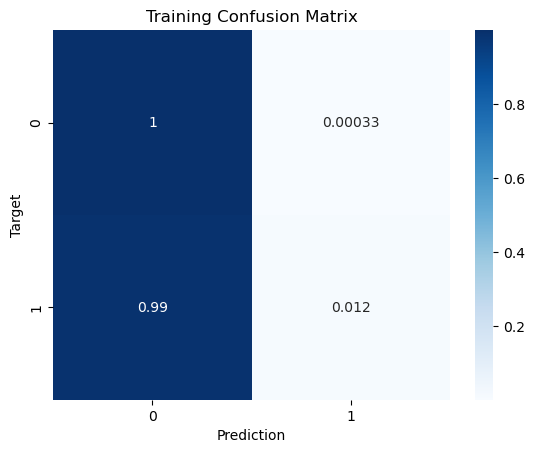

In [350]:
train_preds1 = predict_and_plot(Xs_train, y_train, 'Training')

Accuracy: 94.61%


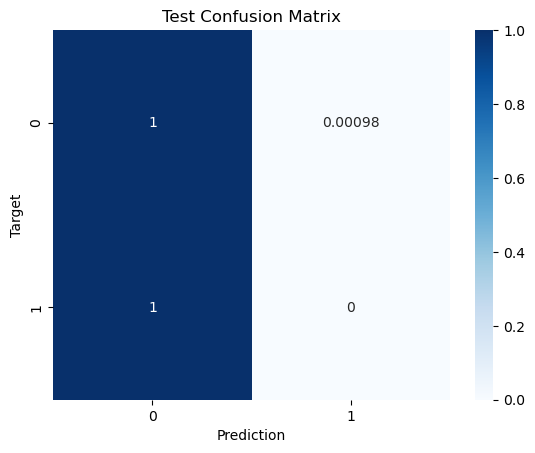

In [351]:
val_preds1 = predict_and_plot(Xs_test, y_test, 'Test')

Using the Logistic Regression as the baseline model with our imbalanced dataset, there is 0 predicted positive cases. To overcome the issue, we can use synthetic minority oversampling technique(SMOTE) to upsample our data to achieve balanced class distribution.

## Baseline model with SMOTE

The data is severely imbalanced with 94.7% of the data consists of WnvPresent = 0.

Since the presense of West Nile Virus is our primary concern, WnvPresent = 1 shall be the positive class. Hence, we will be over-sampling the minority class in this project.

<AxesSubplot:xlabel='wnvpresent', ylabel='Count'>

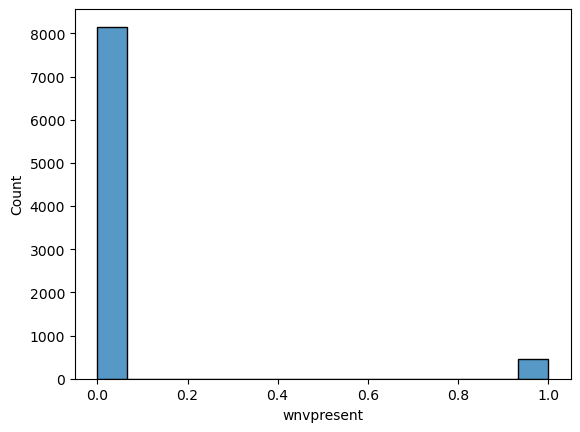

In [352]:
sns.histplot(y)

Above histogram show that training data is highly imbalance where class '0' is close to 8000 and class '1' is close to 500.</br> 
Data is not balanced, we will use SMOTE - Synthetic Minority Oversampling Technique to balance out the data.

<AxesSubplot:xlabel='wnvpresent', ylabel='Count'>

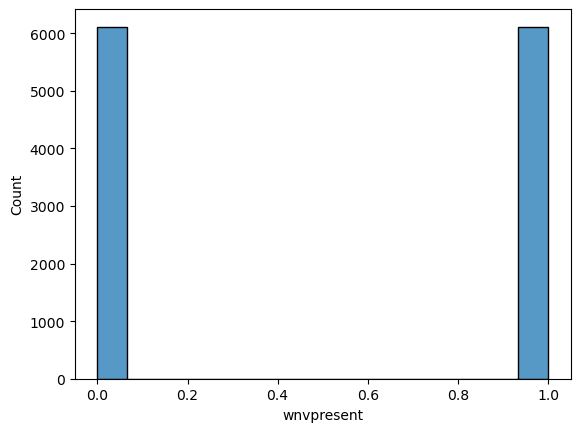

In [353]:
# Using SMOTE to upsampling positive class
smote = SMOTE(random_state=42)
Xsm_train, ysm_train = smote.fit_resample(Xs_train, y_train)
sns.histplot(ysm_train)

Now both the classes are balanced to train our models.

In [354]:
print(Xs_train.shape)
print(Xsm_train.shape)
print(Xs_test.shape)

(6457, 156)
(12228, 156)
(2153, 156)


In [355]:
#check values after SMOTE
ysm_train.value_counts()

0    6114
1    6114
Name: wnvpresent, dtype: int64

0.8080634609093883
0.7408267533673943
Accuracy: 74.08%


<AxesSubplot:>

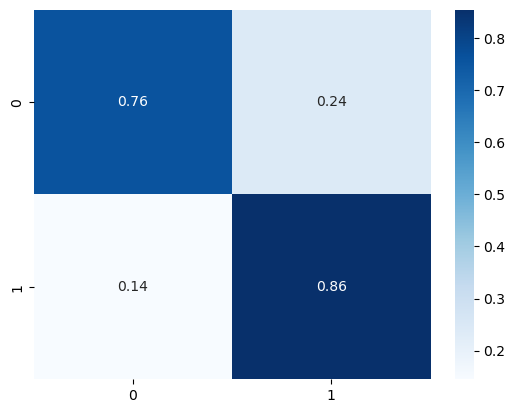

In [368]:
lr_base2 = LogisticRegression(solver='liblinear',random_state = 42)
lr_base2.fit(Xsm_train, ysm_train)
ys_train_pred = lr_base2.predict(Xsm_train)
ys_test_pred = lr_base2.predict(Xs_test)
train_accuracy = accuracy_score(ysm_train, ys_train_pred)
test_accuracy = accuracy_score(y_test, ys_test_pred)
print(train_accuracy)
print(test_accuracy)
print("Accuracy: {:.2f}%".format(test_accuracy * 100))

cm = confusion_matrix(ysm_train, ys_train_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap = 'Blues')

In [369]:
# Print tn, fp, fn, tp values
tn, fp, fn, tp = confusion_matrix(y_test, ys_test_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (sensitivity * precision)/ (sensitivity + precision)
print('True Negative: ',tn)
print('False Positive: ',fp) 
print('False Negative: ',fn)
print('True Positive: ',tp)
print(f'F1-score: {round(f1,4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Sensitivity/ Recall: {round(sensitivity, 4)}')
print(f'Specificity: {round(specificity, 4)}')

True Negative:  1524
False Positive:  515
False Negative:  43
True Positive:  71
F1-score: 0.2029
Precision: 0.1212
Sensitivity/ Recall: 0.6228
Specificity: 0.7474


In [370]:
# Print classification report
print(classification_report(y_test, ys_test_pred))
print('ROC_AUC Score: ', roc_auc_score(y_test, ys_test_pred.ravel())) # ROC AUC score

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      2039
           1       0.12      0.62      0.20       114

    accuracy                           0.74      2153
   macro avg       0.55      0.69      0.52      2153
weighted avg       0.93      0.74      0.81      2153

ROC_AUC Score:  0.6851161129896836


With the upsampled data, the initial missed prediction of the earlier model caused by training with an imbalanced dataset is reduced, with a total of 586 positive cases predicted (FP:515, TP: 71).

We also note that the benchmark (ROC-AUC is 0.6851) for our upsampled dataset, subsequent models with ROC-AUC less than 0.6851 will be rejected.

## Models Fitting and Evaluation

In [775]:
# Function to run models
def run_models(model, model_params, model_name):
    pipe = Pipeline([(model, models[model])])
    
#    grid = GridSearchCV(pipe, param_grid=model_params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid = GridSearchCV(pipe, param_grid=model_params, cv=5, n_jobs=-1)
    grid.fit(Xsm_train, ysm_train)

    # metrics
    train_score = grid.score(Xsm_train, ysm_train)
    test_score = grid.score(Xs_test, y_test)
    preds = grid.predict(Xs_test)
    #predict probablities
    probs = grid.predict_proba(Xs_test)
    #keep probabilities for the positive outcome only
    probs = probs[:, 1]
    #calculate scores
    auc = roc_auc_score(y_test, probs)
    #calculate roc curves
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    #Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    #Calculate the sensitivity/ recall
    sensitivity = tp / (tp + fn)
    #Calculate specificity
    specificity = tn / (tn + fp)
    #Calculate the precision
    precision = tp / (tp + fp)
    #Calculate the f1 score
    f1 = 2 * (sensitivity * precision)/ (sensitivity + precision)
    
    # View confusion matrix
    plot_confusion_matrix(grid, Xs_test, y_test, cmap='Blues', values_format='d');
    
    # print results
    print('************************************************')
    print('  {}'.format(model_name))
    print('************************************************')
    print(f'Best params: {grid.best_params_}')
    print(f'Training score: {round(train_score, 4)}')
    print(f'Test score: {round(test_score, 4)}')
    print(f'Generalisation: {round(abs(100*(test_score-train_score)/test_score),2)}%')
    print(f'F1-score: {round(f1,4)}')
    print(f'Precision: {round(precision, 4)}')
    print(f'Sensitivity/ Recall: {round(sensitivity, 4)}')
    print(f'Specificity: {round(specificity, 4)}')
    print(f'ROC AUC: {round(auc,4)}')
    return grid

In [770]:
# Instantiate models
models = {'lr': LogisticRegression(),
        'dt': DecisionTreeClassifier(),
        'rf': RandomForestClassifier(),
        'gb': GradientBoostingClassifier(),
        'xgb': XGBClassifier(),
        'ada': AdaBoostClassifier()
        } 

In [778]:
# Models parameters
# logistic regression
lr_grid_params = {
    'lr__max_iter': [500, 750],
    'lr__C': np.logspace(-4, 4, 20),
    'lr__penalty': ['l1', 'l2'],
    'lr__solver' : ['liblinear']
}
# decision tree classifier
dt_grid_params = {
    'dt__max_depth': [None, 1, 2, 3],
    'dt__min_samples_split': [5, 10, 15, 20],
    'dt__min_samples_leaf': [50, 100, 150, 200],
}
# random forest classifier
rf_grid_params = {
    'rf__n_estimators': [1000, 1500, 2000],
    'rf__max_depth': [None, 1, 2, 3],
    'rf__min_samples_split': [10, 20, 30],
    'rf__min_samples_leaf':[5, 10, 15],
}

ada_grid_params = {
    'ada__n_estimators': [100, 150, 200,],
    'ada__learning_rate' : [0.1, 0.05, 0.01]
}

# Gradient Boosting Classifier
gb_grid_params = {
    'gb__n_estimators':[100, 150, 200],
    'gb__max_depth' : [1, 2, 3],
    'gb__learning_rate':[0.1, 0.05, 0.01],
}
# XGBoost Classifier
xgb_grid_params = {
    'xgb__n_estimators': [100, 150, 200],
    'xgb__eta' : [0.1, 0.05, 0.01],
    'xgb__max_depth' : [1, 2, 3],
    'xgb__use_label_encoder' : [False],
    'xgb__eval_metric' : ['error', 'auc']
}

/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


************************************************
  Logistic Regression Classifier
************************************************
Best params: {'lr__C': 0.23357214690901212, 'lr__max_iter': 500, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Training score: 0.8089
Test score: 0.7408
Generalisation: 9.19%
F1-score: 0.2074
Precision: 0.1237
Sensitivity/ Recall: 0.6404
Specificity: 0.7464
ROC AUC: 0.773
CPU times: user 6.14 s, sys: 750 ms, total: 6.89 s
Wall time: 13min 33s


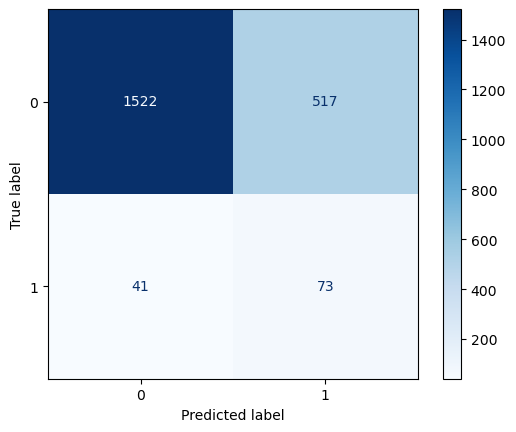

In [362]:
# logistic regression
%time lr = run_models('lr', lr_grid_params, 'Logistic Regression Classifier')

/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


************************************************
  Decision Tree Classifier
************************************************
Best params: {'dt__max_depth': None, 'dt__min_samples_leaf': 50, 'dt__min_samples_split': 15}
Training score: 0.9117
Test score: 0.8927
Generalisation: 2.13%
F1-score: 0.2476
Precision: 0.1969
Sensitivity/ Recall: 0.3333
Specificity: 0.924
ROC AUC: 0.802
CPU times: user 1.58 s, sys: 271 ms, total: 1.85 s
Wall time: 11.2 s


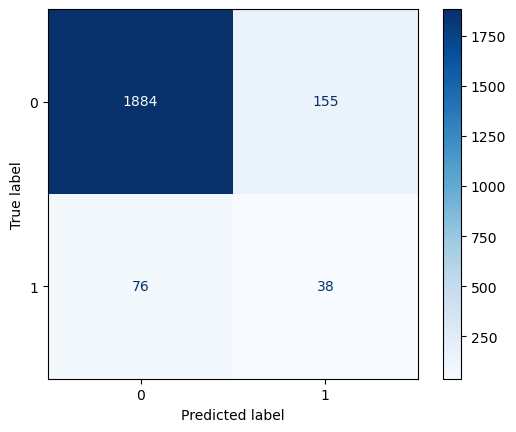

In [363]:
# decision tree classifier
%time dt = run_models('dt', dt_grid_params, 'Decision Tree Classifier')

/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


************************************************
  Random Forest Classifier
************************************************
Best params: {'rf__max_depth': None, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 1500}
Training score: 0.9641
Test score: 0.9387
Generalisation: 2.71%
F1-score: 0.3053
Precision: 0.3816
Sensitivity/ Recall: 0.2544
Specificity: 0.9769
ROC AUC: 0.8703
CPU times: user 32.4 s, sys: 1.4 s, total: 33.8 s
Wall time: 32min 42s


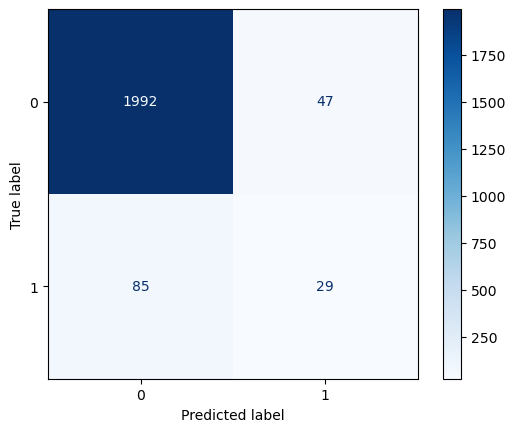

In [364]:
# random forest classifier
%time rf = run_models('rf', rf_grid_params, 'Random Forest Classifier')

/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


************************************************
  Ada Boosting Classifier
************************************************
Best params: {'ada__learning_rate': 0.1, 'ada__n_estimators': 200}
Training score: 0.8926
Test score: 0.8537
Generalisation: 4.56%
F1-score: 0.2953
Precision: 0.1982
Sensitivity/ Recall: 0.5789
Specificity: 0.8691
ROC AUC: 0.8435
CPU times: user 9.99 s, sys: 472 ms, total: 10.5 s
Wall time: 1min 33s


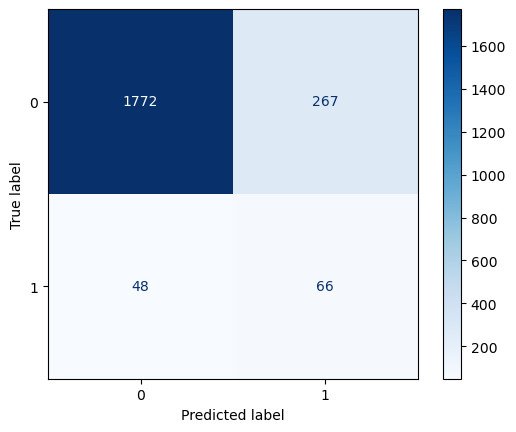

In [726]:
# Ada Boosting Classifier
%time ada = run_models('ada', ada_grid_params, 'Ada Boosting Classifier')

/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


************************************************
  Gradient Boosting Classifier
************************************************
Best params: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 200}
Training score: 0.9693
Test score: 0.9392
Generalisation: 3.21%
F1-score: 0.1761
Precision: 0.3111
Sensitivity/ Recall: 0.1228
Specificity: 0.9848
ROC AUC: 0.8693
CPU times: user 17.1 s, sys: 283 ms, total: 17.4 s
Wall time: 5min 26s


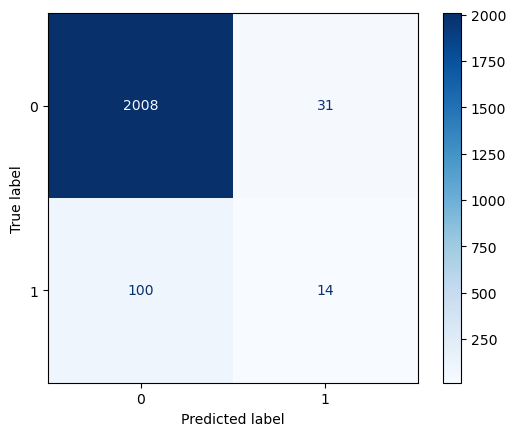

In [366]:
# Gradient Boosting Classifier
%time gb = run_models('gb', gb_grid_params, 'Gradient Boosting Classifier')

/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/lektiekleong/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from p

************************************************
  XGBoost Classifier
************************************************
Best params: {'xgb__eta': 0.1, 'xgb__eval_metric': 'error', 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__use_label_encoder': False}
Training score: 0.9671
Test score: 0.9392
Generalisation: 2.98%
F1-score: 0.1656
Precision: 0.3023
Sensitivity/ Recall: 0.114
Specificity: 0.9853
ROC AUC: 0.8689
CPU times: user 36.2 s, sys: 1.19 s, total: 37.4 s
Wall time: 8min 37s


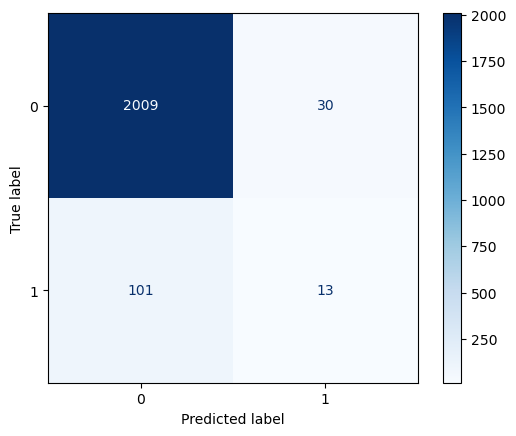

In [367]:
# XGBoost Classifier
%time xgb = run_models('xgb', xgb_grid_params, 'XGBoost Classifier')

The table below shows the various metrics scores of all the classifiers. 

|Classifier|Train score|Test score|Generalisation|Sensitivity|Specificity|Precision|F1 score|Test ROC AUC|Runtime|
|---|---|---|---|---|---|---|---|---|---|
|Logistic Regression|0.8089|0.7408|9.19%|0.6404|0.7464|0.1237|0.2074|0.773|13min 33s|
|Decision Tree|0.9117|0.8927|2.13%|0.3333|0.924|0.1969|0.2476|0.802|11.2s|
|Random Forest|0.9641|0.9387|2.71%|0.2544|0.9769|0.3816|0.3053|0.8703|32min 42s|
|Ada Boost|0.8926|0.8537|4.56%|0.5789|0.8691|0.1982|0.2953|0.8435|1min 33s|
|Gradient Boost|0.9693|0.9392|3.21%|0.1228|0.9848|0.3111|0.1761|0.8693|5min 26s|
|XGBoost|0.9671|0.9392|2.98%|0.114|0.9853|0.3023|0.1656|0.8689|8min 37s|

All the models have a ROC-AUC score higher than the benchmark of 0.6851.

Rndom Forest however, will be chosen as my final model as it has better generalisation and has the highest F1 and ROC AUC score.

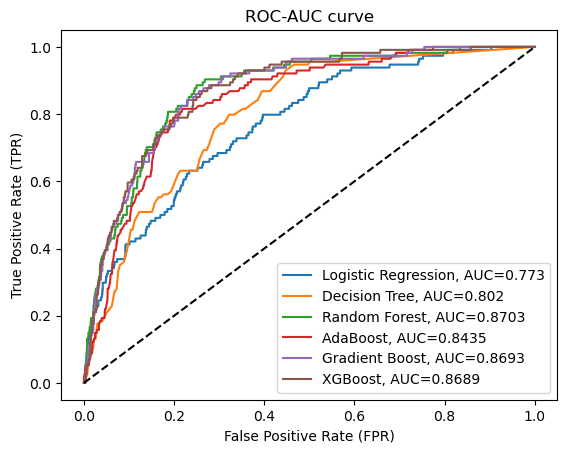

In [372]:
# Plot ROC-AUC curves
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
y_proba = lr.predict_proba(Xs_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
#fpr, tpr, _ = metrics.roc_curve(y_valid, y_proba)
auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit deccision tree model and plot ROC curve
y_proba = dt.predict_proba(Xs_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit random forest model and plot ROC curve
y_proba = rf.predict_proba(Xs_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit adaboost model and plot ROC curve
y_proba = ada.predict_proba(Xs_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
plt.plot(fpr, tpr, label = "AdaBoost, AUC="+str(auc))

#fit gradient boost model and plot ROC curve
y_proba = gb.predict_proba(Xs_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
plt.plot(fpr,tpr,label="Gradient Boost, AUC="+str(auc))

#fit xgboost model and plot ROC curve
y_proba = xgb.predict_proba(Xs_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
plt.plot(fpr, tpr, label = "XGBoost, AUC="+str(auc))

plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.title('ROC-AUC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

## Features Importance

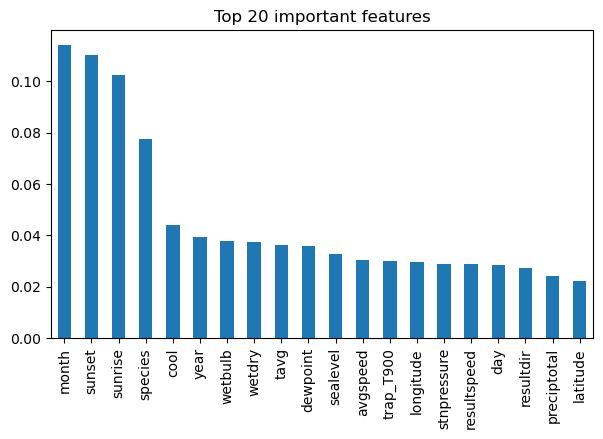

In [728]:
# Plot important features from Gradient Boost classifier
rf = RandomForestClassifier(n_estimators=1500, max_depth=None, min_samples_split=10, min_samples_leaf=5)
rf.fit(Xsm_train, ysm_train)
# Display the most important words to predict the correct results.
feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='bar',figsize=(7,4))
plt.title("Top 20 important features")
plt.show()

### Kaggle submission

In [729]:
# check that shape is same to train dataset
X_kaggle.shape

(116293, 156)

In [734]:
def run_test(model, model_params):
    pipe = Pipeline([
            ('scale', StandardScaler()),
            ('sampling', SMOTE()),
            (model, models[model])
            ])
    
    grid = GridSearchCV(pipe, param_grid=model_params, n_jobs=-1)
    grid.fit(X_train, y_train)
    pred_prob = grid.predict_proba(X_kaggle)
#    pred_prob = grid.predict(X_kaggle)
    train_score = grid.score(X_train, y_train)
    print(f'Training score: {round(train_score, 4)}')
    return pred_prob

In [735]:
# random forest classifier
best_params = {
    'rf__n_estimators': [1500],
    'rf__max_depth': [None],
    'rf__min_samples_split': [10],
    'rf__min_samples_leaf':[5],
}
y_pred = run_test('rf', best_params)

Training score: 0.9449


In [736]:
# y
sub = pd.DataFrame(y_pred[:,1], columns = ['WnvPresent'])
sub.set_index(np.arange(1, X_kaggle.shape[0] + 1), inplace=True)
sub = sub.reset_index().rename(columns = {'index':'Id'})
sub.WnvPresent = sub.WnvPresent.round(1).astype(float)
sub.to_csv('../data/kaggle_submission.csv', index = False)

`Kaggle score`
Score: 0.71472
Private score: 0.69778

In [737]:
sub['WnvPresent'].value_counts()

0.1    35041
0.2    19688
0.3    18994
0.4    17818
0.5    10450
0.0     6557
0.7     3490
0.6     3353
0.8      808
0.9       94
Name: WnvPresent, dtype: int64

### Visulisation on predicted WNV

In [738]:
# Import test dataset
test1 = pd.read_csv('../data/test.csv')

In [739]:
test1.shape

(116293, 11)

In [740]:
test1.head(3)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [741]:
# Merge test dataset with kaggle submission
test1_sub1 = pd.merge(test1, sub, on=['Id'], how='left')

In [742]:
test1_sub1.head(3)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.1
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.1
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.1


In [743]:
# Check numbers of WNV
test1_sub1['WnvPresent'].value_counts()

0.1    35041
0.2    19688
0.3    18994
0.4    17818
0.5    10450
0.0     6557
0.7     3490
0.6     3353
0.8      808
0.9       94
Name: WnvPresent, dtype: int64

In [779]:
# Check number of unique traps
test1_sub1[test1_sub1['WnvPresent']>0.7].nunique()

Id                        902
Date                       20
Address                   126
Species                     2
Block                      62
Street                    117
Trap                      124
AddressNumberAndStreet    126
Latitude                  126
Longitude                 126
AddressAccuracy             4
WnvPresent                  2
Year                        4
Month                       2
Day                        16
dtype: int64

In [745]:
# Convert date to datetime
test1_sub1['Date'] = pd.to_datetime(test1_sub1['Date'])
test1_sub1['Year'] = test1_sub1['Date'].dt.year
test1_sub1['Month'] = test1_sub1['Date'].dt.month
test1_sub1['Day'] = test1_sub1['Date'].dt.day

In [763]:
test1_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
 11  WnvPresent              116293 non-null  float64       
 12  Year                    116293

In [780]:
# Grouping of virus location
wnv_present = test1_sub1.loc[test1_sub1['WnvPresent']>0.7 ,['Year','Month','Trap','Latitude','Longitude','WnvPresent']]
wnv_present.head(3)

,Year,Month,Trap,Latitude,Longitude,WnvPresent
18215,2008,8,T002,41.954690,-87.800991,0.8
18231,2008,8,T015,41.974089,-87.824812,0.8
18327,2008,8,T143,41.999129,-87.795585,0.8


In [781]:
# Total number of virus in perticular area for all years
exploratory_data = wnv_present.groupby(['Year','Month','Latitude','Longitude'], as_index = False)[['WnvPresent']].sum()
exploratory_data

,Year,Month,Latitude,Longitude,WnvPresent
0,2008,8,41.673408,-87.599862,1.6
1,2008,8,41.944869,-87.832763,1.6
2,2008,8,41.954690,-87.800991,0.8
3,2008,8,41.957799,-87.930995,0.8
4,2008,8,41.964242,-87.757639,0.8
5,2008,8,41.973845,-87.805059,0.8
6,2008,8,41.974089,-87.824812,0.8
7,2008,8,41.974689,-87.890615,1.6
8,2008,8,41.981964,-87.812827,0.8
9,2008,8,41.992478,-87.862995,0.8


In [766]:
import plotly.express as px
from matplotlib.lines import Line2D

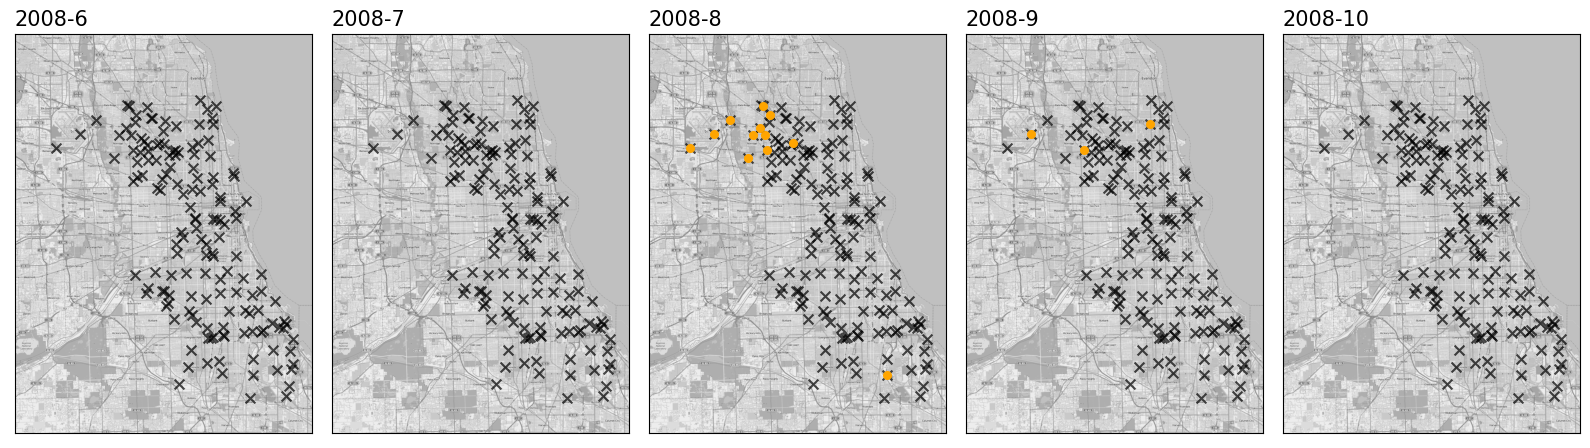

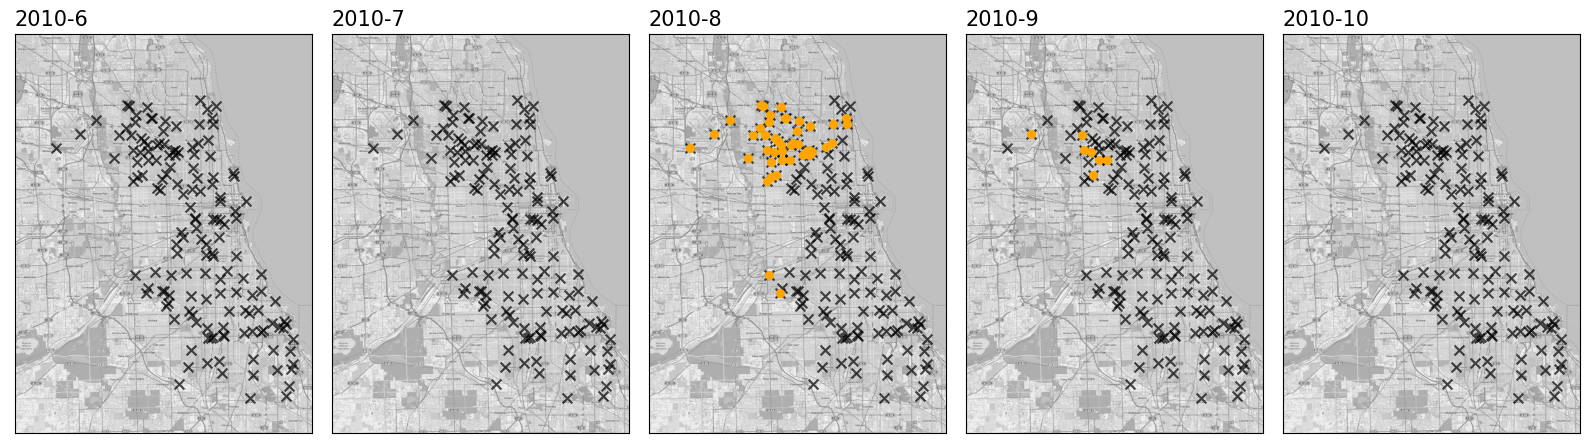

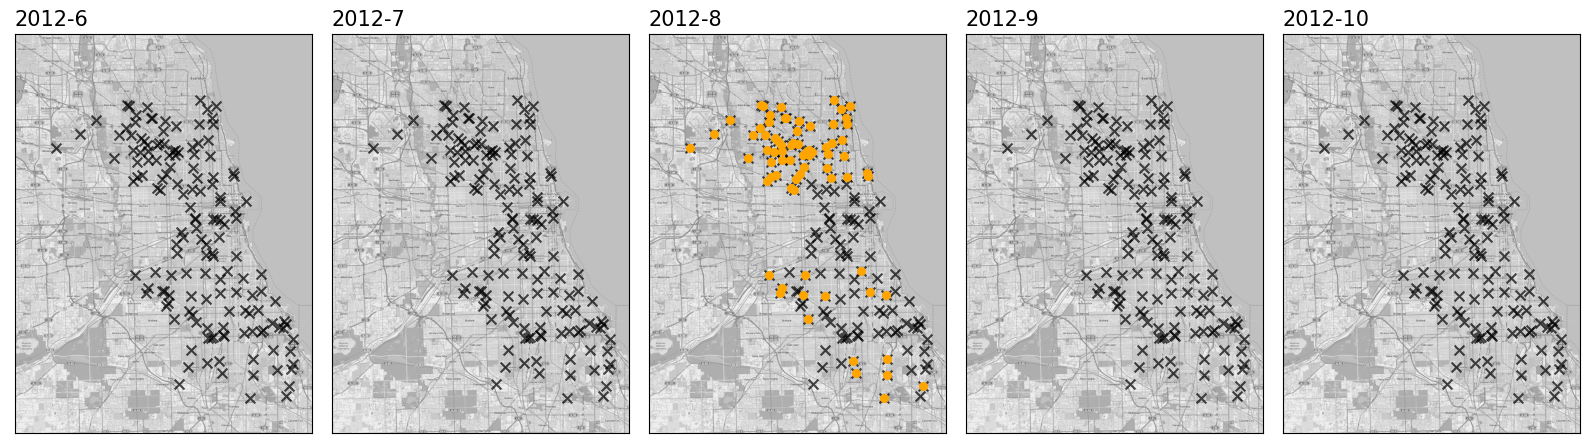

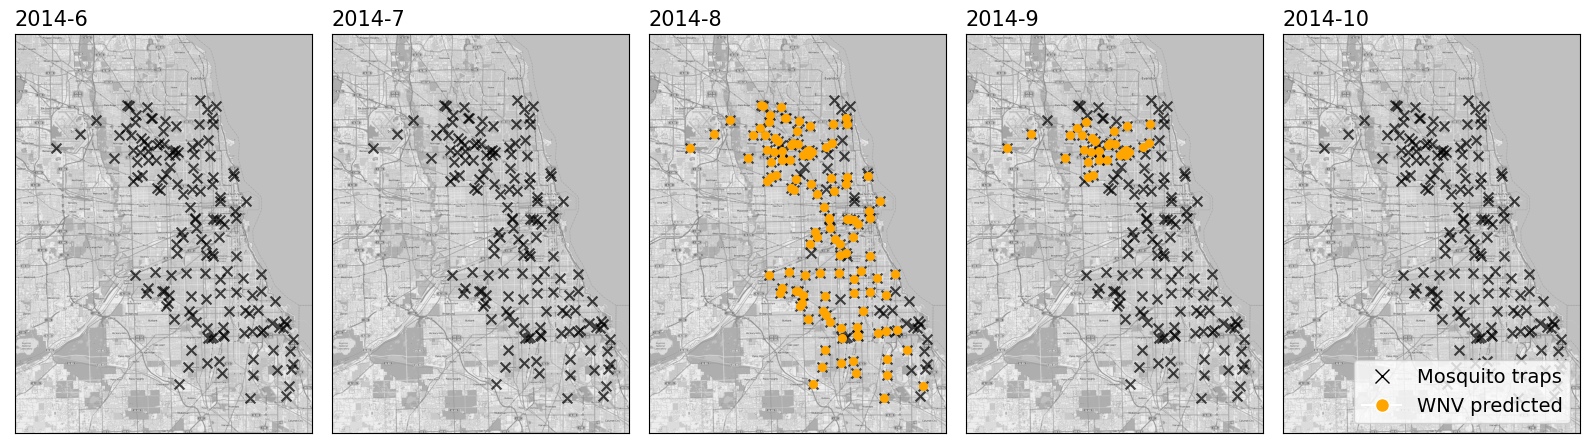

In [782]:
# Plot predicted virus and traps location

# set up basemap
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# create plot for each month and year 
for year in test1_sub1.Year.unique():
    fig, ax = plt.subplots(ncols = 5, figsize = (16,5))
    
    for i, month in enumerate([6,7,8,9,10]):
        # plot basemap
        ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
        
        # plot trap locations
        locations = test1_sub1[['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(locations[:,0], locations[:,1], marker='x', c = 'black', s=50, alpha = 0.7)
        
        # plot wnv locations for year and month
        wnv = test1_sub1[(test1_sub1.Year == year) & (test1_sub1.Month == month) & (test1_sub1.WnvPresent>0.7)]\
                [['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'orange', s = 30)
        
        # title and axes
        ax[i].set_title(f"{year}-{month}", fontsize = 15, ha = 'left', position = (0,1))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
        plt.tight_layout()
# custom legend
legend_elements=[Line2D([0],[0],marker='x', color='black', label='Mosquito traps',linestyle='', markersize=10),
                 Line2D([0],[0],marker='o', color='w',label='WNV predicted',markerfacecolor='orange', markersize=10)]

plt.legend(handles=legend_elements, loc='lower right', fontsize=14)
plt.tight_layout()

From the above plots, it is observed that the predicted WNV are mostly present in the month of August and September, with 2014 having the most WNV.

## Conclusion and Recommendation

### Conclusion

Our model has identified 124 traps for targeted action and with the cost-benefit analysis performed, significant cost savings could be achieved. 

However, the current analysis is oversimplified and generalised which may not be an accurate reflection of the projected spendings/ cost incurred. In addition, other factors such as population density is not considered to evaluate the cost and effort of spraying in low density neighbourhood.

### Recommendation

Explore other efforts such as:

1. Introducing male wolbachia mosquitoes to mate with virus carrying female Culex mosquitoes to prevent eggs from hatching hence reducing the likelihood of new mosquitoes carrying West Nile Virus.
2. Looking into stagnant water bodies that could potentially be a favourable mosquitoes breeding ground. 
3. Educating people on preventive methods to reduce the breeding of mosquitoes